In [1]:
import graphlab

In [14]:
# Limit number of worker processes. This preserves system memory, which prevents hosted notebooks from crashing.
graphlab.set_runtime_config('GRAPHLAB_DEFAULT_NUM_PYLAMBDA_WORKERS', 4)

In [17]:
trades = graphlab.SFrame.read_csv('MULTI_Historical trades.csv', verbose=True)

Finished parsing file /Users/Quentin/Documents/Trade Project/MULTI_Historical trades.csv

Parsing completed. Parsed 38 lines in 0.01211 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,int,str,float,int,int,int,int,int,float,int,int,str,float,float,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Quentin/Documents/Trade Project/MULTI_Historical trades.csv

Parsing completed. Parsed 38 lines in 0.015661 secs.

In [18]:
trades.print_rows(num_rows=50)

+--------+-------------------------------+-------------+--------------+---------------+
| Ticker |              Name             | Date bought | Price bought | Amount Bought |
+--------+-------------------------------+-------------+--------------+---------------+
|  975   |        Mongolian Mining       |  11/5/2016  |     None     |     20000     |
|  1538  |    Zhong Ao Home Group Ltd    |  11/27/2016 |     None     |     40000     |
|  37B   |          B+C SPEAKERS         |  10/21/2013 |     None     |      3000     |
|  AGX   |             Argan             |  7/19/2013  |    15.71     |      5000     |
|  ANIK  |       Anika Therapeutics      |  9/18/2014  |    41.48     |     10000     |
|  BBSI  |   Barrett Business Services   |  11/17/2014 |    32.03     |     30000     |
|  BKS   |        Barnes & Nobles        |  5/24/2014  |    17.38     |     20000     |
|  CAPC  |            Capstone           |   4/1/2017  |  0.5285643   |     45000     |
|  CONN  |             CONN's   

In [19]:
trades.head(3)

Columns:
	Ticker	str
	Name	str
	Date bought	str
	Price bought	float
	Amount Bought	int
	Date sold	str
	Price Sold	float
	Spin-Off	int
	VIC	int
	MF	int
	Valuation	int
	Rev growth	int
	Debt level	float
	Understandable	int
	Researchable	int
	Industry	str
	Market Cap	float
	ROE	float
	Holding duration (months)	int
	P&L	float

Rows: 3

Data:
+--------+-------------------------+-------------+--------------+---------------+
| Ticker |           Name          | Date bought | Price bought | Amount Bought |
+--------+-------------------------+-------------+--------------+---------------+
|  975   |     Mongolian Mining    |  11/5/2016  |     None     |     20000     |
|  1538  | Zhong Ao Home Group Ltd |  11/27/2016 |     None     |     40000     |
|  37B   |       B+C SPEAKERS      |  10/21/2013 |     None     |      3000     |
+--------+-------------------------+-------------+--------------+---------------+
+-----------+------------+----------+-----+----+-----------+------------+------------+
| Date sold | Price Sold | Spin-Off | VIC | MF | Valuation | Rev growth | Debt level |
+-----------+------------+----------+-----+----+-----------+------------+------------+
|  2/2/2017 |    None    |    0     |  1  | 0  |     2     |     0      |    4.1     |
| 7/20/2017 |    None    |    0     |  1  | 0  |     7     |     0      |    0.0     |
| 4/28/2014 |    None    |    0     |  0  | 0  |     7     |     7      |    0.0     |
+-----------+------------+----------+-----+----+-----------+------------+------------+
+----------------+--------------+-------------+------------+-------+---------------------------+
| Understandable | Researchable |   Industry  | Market Cap |  ROE  | Holding duration (months) |
+----------------+--------------+-------------+------------+-------+---------------------------+
|       3        |      2       |  Commodity  |   1800.0   |  -0.7 |             3             |
|       7        |      4       |     REIT    |   658.0    | -0.01 |             8             |
|       8        |      7       | Electronics |   130.0    |  0.28 |             6             |
+----------------+--------------+-------------+------------+-------+---------------------------+
+-------+
|  P&L  |
+-------+
| -0.02 |
| -0.38 |
|  0.5  |
+-------+
[3 rows x 20 columns]

In [20]:
#trades['Date bought'] = trades['Date bought'].apply(toD)   #convert to date format

In [21]:
graphlab.canvas.set_target('ipynb')
trades.show(view="Scatter plot", x="Debt level", y="P&L")

In [22]:
trades.show(view="Scatter Plot", x="Market Cap", y="P&L") #learn 

In [23]:
my_features = [
 'Amount Bought',
 'Spin-Off',
 'VIC',
 'MF',
 'Valuation',
 'Rev growth',
 'Debt level',
 'Understandable',
 'Researchable',
 'Market Cap',
 'ROE']

In [24]:
trades.column_names()

['Ticker',
 'Name',
 'Date bought',
 'Price bought',
 'Amount Bought',
 'Date sold',
 'Price Sold',
 'Spin-Off',
 'VIC',
 'MF',
 'Valuation',
 'Rev growth',
 'Debt level',
 'Understandable',
 'Researchable',
 'Industry',
 'Market Cap',
 'ROE',
 'Holding duration (months)',
 'P&L']

In [11]:
#train_data,test_data = trades.random_split(.8,seed=0) #Commenting to run model on all trades in file

In [25]:
linear_model = graphlab.linear_regression.create(trades,target='P&L',features=my_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 38

Number of features          : 11

Number of unpacked features : 11

Number of coefficients    : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.004748     | 1.222428           | 0.485858      |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [27]:
print test_data['P&L'].mean()

-0.186


In [26]:
print linear_model.evaluate(trades)

{'max_error': 1.2224277075188301, 'rmse': 0.4858576638749993}


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Quentin/anaconda/envs/gl-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


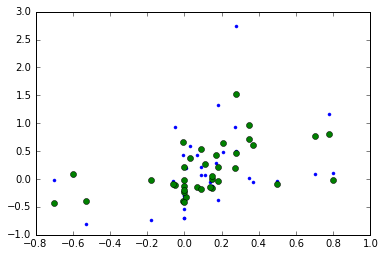

In [29]:
plt.plot(trades['ROE'],trades['P&L'],'.',
        trades['ROE'],linear_model.predict(trades),'o')

In [30]:
linear_model.get('coefficients').sort('value', ascending=False).print_rows(num_rows=15)

+----------------+-------+--------------------+-------------------+
|      name      | index |       value        |       stderr      |
+----------------+-------+--------------------+-------------------+
|    Spin-Off    |  None |   0.642470256505   |   0.441155754941  |
|      ROE       |  None |   0.573657128355   |   0.384400041559  |
|      VIC       |  None |   0.564014250746   |   0.239247571063  |
|       MF       |  None |   0.222683644919   |   0.258159045981  |
|   Rev growth   |  None |  0.0622985822563   |  0.0351367228878  |
|   Valuation    |  None |  0.0509661374379   |  0.0406978341406  |
|  (intercept)   |  None |  0.0324895619866   |   0.519096410939  |
|  Researchable  |  None |  0.0130681485219   |  0.0632841529956  |
|   Market Cap   |  None | -3.38070419453e-07 | 2.26057065472e-06 |
| Amount Bought  |  None | -2.27753094838e-05 | 1.02312129277e-05 |
|   Debt level   |  None |  -0.0228669650083  |  0.0219175639819  |
| Understandable |  None |  -0.0679975854565  | 

In [31]:
CAPC = trades[trades['Ticker']=='CAPC']

In [32]:
print linear_model.predict(trades[trades['Ticker']=='CONN'])

[-0.10461473936849422]


In [ ]:
type(CAPC)

In [ ]:
linear_model.predict(CAPC)[0]

In [33]:
# Display trade according to prediction (limited value since this is the training set)
liste = []
for i in range(len(trades)):
    tick = trades['Ticker'][i]
    #print(tick, linear_model.predict(trades[trades['Ticker']==tick])[0])
    liste.append((tick, linear_model.predict(trades[trades['Ticker']==tick])[0]))

In [34]:
sorted(liste, key=lambda x: -x[1])

[('AGX', 1.51757229248117),
 ('RMR', 0.9682301268154769),
 ('NHTC', 0.7975075127285038),
 ('IQNT', 0.7698072650982097),
 ('RWWI', 0.7212584574602661),
 ('LCI', 0.6571755334550841),
 ('NZM', 0.6535665766052112),
 ('PIH', 0.6131510103737114),
 ('TIBN', 0.5355653872332266),
 ('37B', 0.46509307418083373),
 ('SAVE', 0.4362529979917402),
 ('GUD', 0.3734046369079106),
 ('ONE', 0.261391936917293),
 ('ESI', 0.2100520656730036),
 ('ZINC', 0.20853532886810575),
 ('BBSI', 0.20397812454959974),
 ('HZN', 0.08468922615309865),
 ('VLS', 0.052827639805576296),
 ('GOOG', 0.0012154854535542936),
 ('LC', -0.010710427748429396),
 ('CAPC', -0.018731180491267707),
 ('TPUB', -0.02332517758531219),
 ('PII', -0.03584392466235008),
 ('SRG', -0.09076368439126253),
 ('KSC', -0.09456964287319441),
 ('CONN', -0.10461473936849422),
 ('LEE', -0.12236153246342374),
 ('PCP', -0.13984931516972338),
 ('IBKR', -0.15131186548157943),
 ('ANIK', -0.1670395830253348),
 ('WIN', -0.18343919253898666),
 ('SBSA', -0.20145672985938

In [35]:
# Load new file with new trades (first one: PLPM - Planet Payment) for prediction
trades2 = graphlab.SFrame.read_csv('MULTI_Historical trades2.csv', verbose=True)

Finished parsing file /Users/Quentin/Documents/Trade Project/MULTI_Historical trades2.csv

Parsing completed. Parsed 39 lines in 0.07209 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,float,int,str,float,int,int,int,int,int,float,int,int,str,int,float,int,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Quentin/Documents/Trade Project/MULTI_Historical trades2.csv

Parsing completed. Parsed 39 lines in 0.015357 secs.

In [44]:
trades2[trades2['Ticker']=='PLPM']

Columns:
	Ticker	str
	Name	str
	Date bought	str
	Price bought	float
	Amount Bought	int
	Date sold	str
	Price Sold	float
	Spin-Off	int
	VIC	int
	MF	int
	Valuation	int
	Rev growth	int
	Debt level	float
	Understandable	int
	Researchable	int
	Industry	str
	Market Cap	int
	ROE	float
	Holding duration (months)	int
	P&L	float
	X21	str

Rows: Unknown

Data:
+--------+----------------+-------------+--------------+---------------+-----------+
| Ticker |      Name      | Date bought | Price bought | Amount Bought | Date sold |
+--------+----------------+-------------+--------------+---------------+-----------+
|  PLPM  | Planet Payment |    8/8/17   |     3.3      |     30000     |           |
+--------+----------------+-------------+--------------+---------------+-----------+
+------------+----------+-----+----+-----------+------------+------------+----------------+
| Price Sold | Spin-Off | VIC | MF | Valuation | Rev growth | Debt level | Understandable |
+------------+----------+-----+----+-----------+------------+------------+----------------+
|    None    |    0     |  1  | 0  |     6     |     0      |    0.0     |       6        |
+------------+----------+-----+----+-----------+------------+------------+----------------+
+--------------+---------------------+------------+------+---------------------------+
| Researchable |       Industry      | Market Cap | ROE  | Holding duration (months) |
+--------------+---------------------+------------+------+---------------------------+
|      7       | Payments Processing |    161     | 0.81 |            None           |
+--------------+---------------------+------------+------+---------------------------+
+------+-----+
| P&L  | ... |
+------+-----+
| None | ... |
+------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [45]:
linear_model.predict(trades2[trades2['Ticker']=='PLPM'])

dtype: float
Rows: 1
[0.3671407243911379]